<a href="https://colab.research.google.com/github/gj0210/CMP7239/blob/main/vish%20Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generating histograms for numerical features...


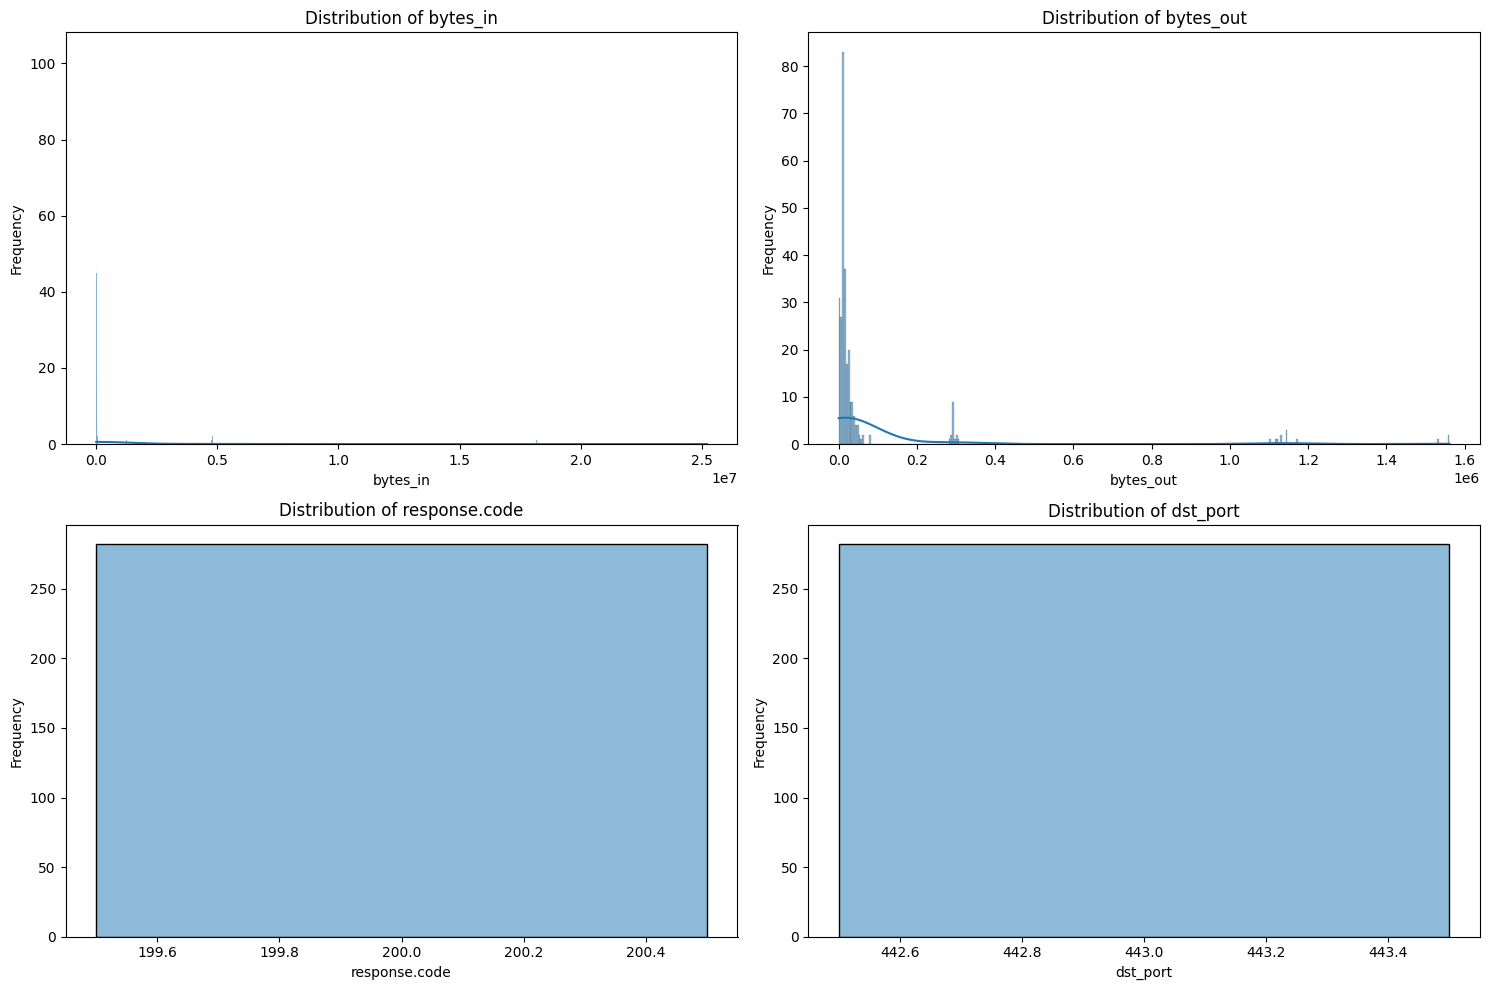

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the numerical features
numerical_features = ['bytes_in', 'bytes_out', 'response.code', 'dst_port']

# Create histograms for each numerical feature
print("Generating histograms for numerical features...")
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# from imblearn.over_sampling import SMOTE # Removed SMOTE
import warnings
import zipfile
import os

# Suppress a common warning from imblearn when using SMOTE
warnings.filterwarnings("ignore", category=UserWarning)

# --- 1. DATA LOADING AND INITIAL ANALYSIS ---
print("--- Step 1: Loading Dataset and Initial Analysis ---")

# The path to your uploaded zip file.
zip_file_path = 'archive(4).zip'
csv_file_name = 'CloudWatch_Traffic_Web_Attack.csv'
extracted_csv_path = csv_file_name # Extract to the current directory

try:
    # Extract the CSV file from the zip archive
    print(f"Extracting '{csv_file_name}' from '{zip_file_path}'...")
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extract(csv_file_name, path='.') # Extract to current directory

    # Read the extracted CSV file into a pandas DataFrame.
    # We will also parse the 'time' column as datetime objects
    df = pd.read_csv(extracted_csv_path)
    print("Dataset loaded successfully.")
    print("\nInitial Data Preview:")
    print(df.head())
    print("\nDataFrame Info:")
    df.info()

    # Check the class distribution. The 'rule_names' column contains our labels.
    print("\nInitial Class Distribution:")
    print(df['rule_names'].value_counts())

    # We will create a binary target variable: 1 for 'Suspicious Web Traffic' and 0 otherwise.
    df['is_attack'] = df['rule_names'].apply(lambda x: 1 if 'Suspicious Web Traffic' in x else 0)
    print("\nBinary Target Variable Distribution:")
    print(df['is_attack'].value_counts())

except FileNotFoundError:
    print(f"Error: The file at '{zip_file_path}' was not found. Please ensure the file path is correct.")
    exit()
except KeyError:
    print(f"Error: The file '{csv_file_name}' was not found inside the zip archive.")
    exit()
except zipfile.BadZipFile:
    print(f"Error: The file '{zip_file_path}' is not a valid zip file.")
    exit()


# --- 2. DATA PREPARATION & HANDLING CLASS IMBALANCE ---
print("\n--- Step 2: Data Preparation & Handling Class Imbalance ---")

# Select features (X) and target (y). We'll drop non-numerical or irrelevant columns.
X = df.drop(columns=['creation_time', 'end_time', 'src_ip', 'src_ip_country_code',
                     'protocol', 'dst_ip', 'rule_names', 'observation_name',
                     'source.meta', 'source.name', 'time', 'detection_types', 'is_attack'])
y = df['is_attack']

# Split the data into training and testing sets before balancing.
# This ensures the test set remains a true, untouched representation of the original data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples") # Updated print statement
print(f"Testing set size: {X_test.shape[0]} samples")
print("\nTraining set distribution:") # Updated print statement
print(y_train.value_counts())

# Apply SMOTE to the training data to balance the classes.
# print("\nApplying SMOTE to training data...") # Removed SMOTE
# smote = SMOTE(random_state=42) # Removed SMOTE
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) # Removed SMOTE

# print("\nTraining set distribution after SMOTE:") # Removed SMOTE
# print(y_train_resampled.value_counts()) # Removed SMOTE

# Use the original training data since SMOTE was not applied
X_train_resampled = X_train
y_train_resampled = y_train


# --- 3. MODEL TRAINING ---
print("\n--- Step 3: Model Training ---")

# Train Decision Tree Classifier (our baseline)
print("Training Decision Tree model...")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resampled, y_train_resampled)

# Train Random Forest Classifier (our main model)
print("Training Random Forest Classifier model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_resampled, y_train_resampled)

# --- 4. MODEL EVALUATION ---
print("\n--- Step 4: Model Evaluation ---")

# Evaluate Decision Tree on the original, unbalanced test set.
print("=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=")
print("     Decision Tree Performance     ")
print("=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=")
y_pred_dt = dt_model.predict(X_test)

print("Overall Accuracy:", accuracy_score(y_test, y_pred_dt))


# Evaluate Random Forest on the original, unbalanced test set.
print("\n\n=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=")
print("      Random Forest Performance      ")
print("=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=")
y_pred_rf = rf_model.predict(X_test)

print("Overall Accuracy:", accuracy_score(y_test, y_pred_rf))

# Optional: Clean up the extracted CSV file
# os.remove(extracted_csv_path)

--- Step 1: Loading Dataset and Initial Analysis ---
Extracting 'CloudWatch_Traffic_Web_Attack.csv' from 'archive(4).zip'...
Dataset loaded successfully.

Initial Data Preview:
   bytes_in  bytes_out         creation_time              end_time  \
0      5602      12990  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
1     30912      18186  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
2     28506      13468  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
3     30546      14278  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   
4      6526      13892  2024-04-25T23:00:00Z  2024-04-25T23:10:00Z   

            src_ip src_ip_country_code protocol  response.code  dst_port  \
0   147.161.161.82                  AE    HTTPS            200       443   
1     165.225.33.6                  US    HTTPS            200       443   
2  165.225.212.255                  CA    HTTPS            200       443   
3   136.226.64.114                  US    HTTPS            200       443   
4   165.225.240.79    


Analyzing the distribution of source IP country codes...
Generating bar plot for top 10 source countries...


/tmp/ipython-input-184173339.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='count', data=top_10_countries, palette='viridis')


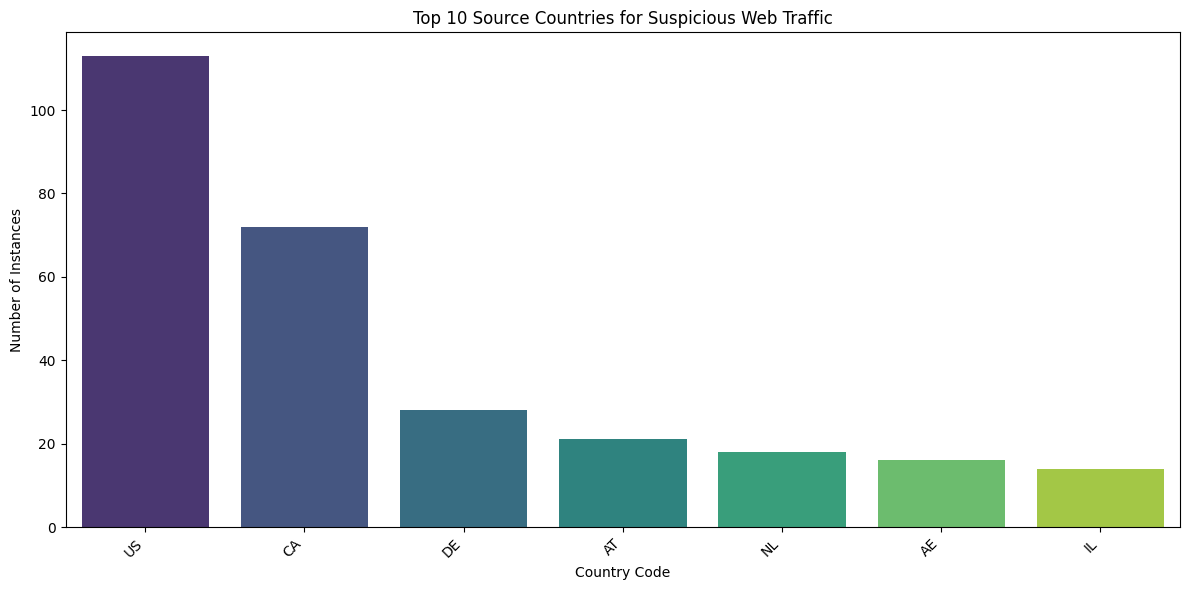

In [20]:
# Analyze the distribution of source IP country codes
print("\nAnalyzing the distribution of source IP country codes...")
country_counts = df['src_ip_country_code'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Get the top 10 countries
top_10_countries = country_counts.head(10)

# Create a bar plot of the top 10 countries
print("Generating bar plot for top 10 source countries...")
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='count', data=top_10_countries, palette='viridis')
plt.title('Top 10 Source Countries for Suspicious Web Traffic')
plt.xlabel('Country Code')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()